In [40]:
import json

In [41]:
s = '526591|0.00|-12.39|-6.40|-1.61|-0.10|10.77|30.27'

In [42]:
s = s.split('|')

In [43]:
obj = {
    'timestamp': int(s[0]),
    'gyro': [float(s[1]), float(s[2]), float(s[3])],
    'acc': [ float(s[4]), float(s[5]), float(s[6])],
    'temperature': float(s[7])
}

In [44]:
obj

{'timestamp': 526591,
 'gyro': [0.0, -12.39, -6.4],
 'acc': [-1.61, -0.1, 10.77],
 'temperature': 30.27}

In [45]:
js = json.dumps(obj)

In [46]:
def parse_telemetry(telemetry: str = ''):
    _ = telemetry.split('|')
    obj = {
        'timestamp': int(_[0]),
        'gyro': [float(_[1]), float(_[2]), float(_[3])],
        'acc': [ float(_[4]), float(_[5]), float(_[6])],
        'temperature': float(_[7])
    }
    return obj

In [47]:
import numpy as np
import math
import time

vector_size = 10_000_000
vector = np.random.rand(vector_size)

# NumPy implementation
start_time = time.time()
magnitude_np = np.linalg.norm(vector)
numpy_time = time.time() - start_time
print(f"NumPy time: {numpy_time} seconds")

# Pure Python implementation
start_time = time.time()
magnitude_py = math.sqrt(sum([component**2 for component in vector]))
python_time = time.time() - start_time
print(f"Python time: {python_time} seconds")


NumPy time: 0.01645493507385254 seconds
Python time: 0.9553449153900146 seconds


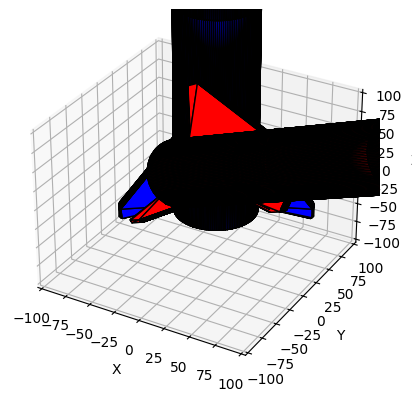

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from stl import mesh

# Load the STL file
stl_mesh = mesh.Mesh.from_file('/Users/boulamakandine/projects/kara/ground-control/python-gc/src/files/k01.stl')

# Define functions to calculate the rotation matrix for pitch, yaw, and roll
def rotation_matrix(pitch, yaw, roll):
    R_pitch = np.array([[1, 0, 0],
                         [0, np.cos(pitch), -np.sin(pitch)],
                         [0, np.sin(pitch), np.cos(pitch)]])
    
    R_yaw = np.array([[np.cos(yaw), 0, np.sin(yaw)],
                       [0, 1, 0],
                       [-np.sin(yaw), 0, np.cos(yaw)]])
    
    R_roll = np.array([[np.cos(roll), -np.sin(roll), 0],
                        [np.sin(roll), np.cos(roll), 0],
                        [0, 0, 1]])
    
    return np.dot(R_roll, np.dot(R_yaw, R_pitch))

def rotate_vertices(vertices, R):
    return np.dot(R, vertices.T).T

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original STL mesh
mesh_data = np.array(stl_mesh.vectors)
poly3d = [[tuple(vertex) for vertex in triangle] for triangle in mesh_data]
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='b', linewidths=1, edgecolors='k'))

# Set limits and labels
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Calculate the rotation matrix for 45 degrees pitch, yaw, and roll
pitch = np.radians(45)
yaw = np.radians(45)
roll = np.radians(45)
R = rotation_matrix(pitch, yaw, roll)

# Rotate the vertices of the mesh
rotated_vertices = rotate_vertices(stl_mesh.vectors.reshape((-1, 3)), R).reshape((-1, 3, 3))

# Plot the rotated STL mesh
mesh_data_rotated = np.array(rotated_vertices)
poly3d_rotated = [[tuple(vertex) for vertex in triangle] for triangle in mesh_data_rotated]
ax.add_collection3d(Poly3DCollection(poly3d_rotated, facecolors='r', linewidths=1, edgecolors='k'))

# Show the plot
plt.show()